<a href="https://colab.research.google.com/github/Shaan2522/DL-Models/blob/main/1_CreditCard_Churn_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary libraries**

---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Churn_Modelling.csv')

**Data Preprocessing**

---

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

**EDA**

---

In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Model Building**

---

In [ ]:
# convert categorical data into numerical
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,False,False,True
1561,632,42,4,119624.60,2,1,1,195978.86,True,False,True
1670,559,24,3,114739.92,1,1,0,85891.02,False,True,True
6087,561,27,9,135637.00,1,1,0,153080.40,False,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,False,False,True


In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# to improve the accuracy of the model we increase the hidden layes
# (not very much coz then it will cause over-fitting), also
# we keep the activation function as relu and not sigmoid and
# we can increase the number of nodes as well.
model = Sequential()

model.add(Dense(11, activation='relu', input_dim = 11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 5s 16ms/step - loss: 0.5674 - accuracy: 0.7428 - val_loss: 0.4847 - val_accuracy: 0.7994
Epoch 2/100
200/200 [==============================] - 3s 16ms/step - loss: 0.4733 - accuracy: 0.7962 - val_loss: 0.4393 - val_accuracy: 0.8106
Epoch 3/100
200/200 [==============================] - 2s 12ms/step - loss: 0.4390 - accuracy: 0.8072 - val_loss: 0.4143 - val_accuracy: 0.8231
Epoch 4/100
200/200 [==============================] - 3s 14ms/step - loss: 0.4173 - accuracy: 0.8205 - val_loss: 0.4008 - val_accuracy: 0.8319
Epoch 5/100
200/200 [==============================] - 2s 10ms/step - loss: 0.4013 - accuracy: 0.8283 - val_loss: 0.3892 - val_accuracy: 0.8338
Epoch 6/100
200/200 [==============================] - 3s 13ms/step - loss: 0.3860 - accuracy: 0.8400 - val_loss: 0.3772 - val_accuracy: 0.8400
Epoch 7/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3722 - accuracy: 0.8464 - val_loss: 0.3686 - val_accuracy: 

In [ ]:
model.layers[0].get_weights()

[array([[-2.92635828e-01,  5.37542552e-02, -5.83954006e-02,
         -1.46859497e-01,  1.72953978e-01, -1.13688350e-01,
         -2.06568763e-01,  1.66257601e-02,  2.75774468e-02,
         -6.28247932e-02, -1.77370477e-02],
        [-4.63767573e-02,  1.36613116e-01,  2.54497588e-01,
          1.02051842e+00,  3.28080535e-01,  1.40575320e-01,
          8.88058245e-02, -1.98026448e-01, -6.28110647e-01,
          4.21408713e-01, -2.66865760e-01],
        [-1.46160766e-01,  1.00305393e-01, -1.27134286e-02,
          4.17861827e-02, -7.36874342e-02, -1.85949758e-01,
         -5.96317984e-02,  1.47628218e-01, -2.95767337e-02,
          7.31311142e-02, -3.00400317e-01],
        [-6.81599975e-01,  4.41028774e-01, -1.99189365e-01,
         -9.96064395e-02, -1.19722076e-01,  6.85438275e-01,
          1.27130747e+00, -3.95708978e-01,  9.47403535e-02,
         -4.44011301e-01, -3.88458312e-01],
        [ 2.23205194e-01, -4.32855815e-01,  1.06267345e+00,
          3.84877294e-01, -1.27779853e+00,  

In [ ]:
model.layers[1].get_weights()

[array([[-0.07465085,  0.11506037, -0.06097783,  0.7088032 ,  0.28773016,
          0.46305597,  0.25556862, -0.8099595 , -0.18755892,  0.03201816,
          0.2539741 ],
        [ 0.24166816,  0.3906109 ,  0.00581337, -0.5138619 , -0.03630792,
          0.09616212, -0.5560183 , -0.83038557,  0.03184942,  0.09923473,
          0.17140412],
        [ 1.0999731 , -0.6457373 ,  0.42578074, -0.38858134, -0.04691998,
         -0.37651357,  0.71521163, -0.0641669 ,  0.56541467, -0.328935  ,
          0.22405413],
        [-0.38250598, -0.03487362,  0.8783915 ,  0.02628659, -0.9282539 ,
         -0.8772376 , -0.4737598 , -0.9870609 ,  0.61434066,  0.46666467,
         -0.6231184 ],
        [ 0.70032936,  0.24363868,  0.3905403 ,  0.3250487 , -0.2313853 ,
         -0.1892035 ,  0.5385407 ,  0.01504947,  0.0139337 , -0.10364009,
          0.32607716],
        [ 0.96616757, -0.3444562 , -0.34960338, -0.01356634,  0.5147868 ,
          0.10375726,  0.39656556, -0.45569092, -0.4949519 ,  0.0090863

In [ ]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [ ]:
y_pred = np.where(y_log > 0.5, 1, 0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

**Model evaluation**

---



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.862

In [ ]:
history.history

{'loss': [0.5674293041229248,
  0.4732552468776703,
  0.43898823857307434,
  0.417293518781662,
  0.4012605547904968,
  0.3860083520412445,
  0.3721984028816223,
  0.3626195192337036,
  0.35520172119140625,
  0.3502488434314728,
  0.3469344675540924,
  0.3440823256969452,
  0.34204867482185364,
  0.34046444296836853,
  0.33916252851486206,
  0.33807191252708435,
  0.33661001920700073,
  0.3360200524330139,
  0.3349285423755646,
  0.33399954438209534,
  0.33327195048332214,
  0.332718163728714,
  0.33130112290382385,
  0.33139747381210327,
  0.33042144775390625,
  0.3300749957561493,
  0.3290954828262329,
  0.3290969729423523,
  0.3281506299972534,
  0.3273290693759918,
  0.32719460129737854,
  0.3271893262863159,
  0.326527863740921,
  0.3258405327796936,
  0.3257139325141907,
  0.32504594326019287,
  0.3246736228466034,
  0.3238002061843872,
  0.3240622580051422,
  0.32387784123420715,
  0.32351911067962646,
  0.3227025270462036,
  0.3226203918457031,
  0.3224133551120758,
  0.3222742

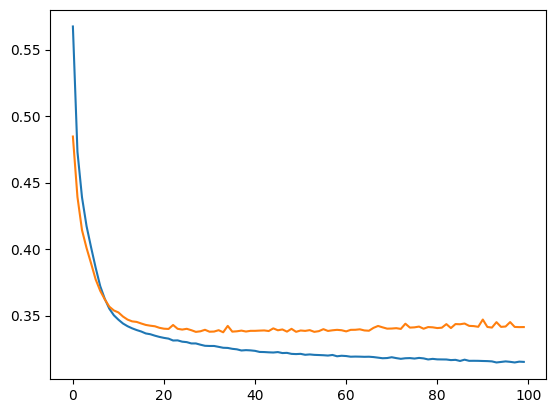

In [ ]:
# training error reduction graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

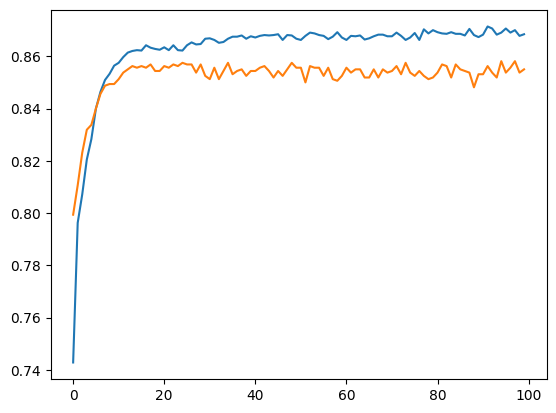

In [ ]:
# training accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])